**DATA LOADING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file1 = "/content/drive/MyDrive/Dataset_Cuaca/Weather_Data_1980-2024.csv"
file2 = "/content/drive/MyDrive/Dataset_Cuaca/Weather_dataset.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

**DATA CLEANING & PREPROCESSING**

In [ ]:
# Menambahkan kolom Is_Day pada dataset ke2 (Weather_dataset.csv) dengan menambahkan kolom hour
import pandas as pd

# Load dataset 2
df2 = pd.read_csv('/content/drive/MyDrive/Dataset_Cuaca/Weather_dataset.csv', sep=',')

# Memastikan time menjadi datetime
df2['time'] = pd.to_datetime(df2['time'])
df2['hour'] = df2['time'].dt.hour # Mengambil waktu (jam)

# Generate kolom is_Day
df2['is_Day'] = df2['hour'].apply(lambda h: 1 if 6 <= h <= 17 else 0)
df2[['time','hour','is_Day']].head()

,time,hour,is_Day
0,2000-01-01 00:00:00,0,0
1,2000-01-01 01:00:00,1,0
2,2000-01-01 02:00:00,2,0
3,2000-01-01 03:00:00,3,0
4,2000-01-01 04:00:00,4,0


In [ ]:
# Mengecek kolom pada dataset
print(df1.columns.tolist())
print(df2.columns.tolist())

['time', 'temperature', 'relative_humidity', 'dew_point', 'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 'wind_direction', 'is_Day']
['time', 'temperature', 'relative_humidity', 'dew_point', 'precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 'wind_direction', 'hour', 'is_Day']


In [ ]:
# Menggabungkan 2 dataset
# Buang kolom hour dari df2
if 'hour' in df2.columns:
    df2 = df2.drop(columns=['hour'])

# Menyamakan urutan kolom df2 dengan df1
df2 = df2[df1.columns]

# Gabungkan dataset
df_gabungan = pd.concat([df1, df2], ignore_index=True)
df_gabungan.info()

print("Jumlah baris :", df_gabungan.shape[0])
print("Jumlah kolom :", df_gabungan.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603648 entries, 0 to 603647
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   time                           603648 non-null  object 
 1   temperature                    603648 non-null  float64
 2   relative_humidity              603648 non-null  int64  
 3   dew_point                      603648 non-null  float64
 4   precipitation (mm)             603648 non-null  float64
 5   rain (mm)                      603648 non-null  float64
 6   snowfall (cm)                  603648 non-null  float64
 7   pressure_msl (hPa)             603648 non-null  float64
 8   surface_pressure (hPa)         603648 non-null  float64
 9   cloud_cover (%)                603648 non-null  int64  
 10  cloud_cover_low (%)            603648 non-null  int64  
 11  cloud_cover_mid (%)            603648 non-null  int64  
 12  cloud_cover_high (%)          

In [ ]:
# Mengecek Duplikat pada data

# Cek apakah ada duplikat
print("Ada duplikat?", df_gabungan.duplicated().any())

# Hitung jumlah duplikat
print("Jumlah duplikat:", df_gabungan.duplicated().sum())

# Tampilkan baris duplikat
duplicates = df_gabungan[df_gabungan.duplicated()]
print(duplicates)

# Hapus duplikat
df_gabungan = df_gabungan.drop_duplicates().reset_index(drop=True)

# Cek ulang
print("Duplikat setelah dibuang:", df_gabungan.duplicated().sum())

Ada duplikat? False
Jumlah duplikat: 0
Empty DataFrame
Columns: [time, temperature, relative_humidity, dew_point, precipitation (mm), rain (mm), snowfall (cm), pressure_msl (hPa), surface_pressure (hPa), cloud_cover (%), cloud_cover_low (%), cloud_cover_mid (%), cloud_cover_high (%), vapour_pressure_deficit (kPa), wind_speed_10m (km/h), wind_direction, is_Day]
Index: []
Duplikat setelah dibuang: 0


In [ ]:
# Mengecek Missing values pada data

# Cek apakah ada missing values
print("Ada missing values?", df_gabungan.isnull().any().any())

# Hitung jumlah missing values per kolom
missing_counts = df_gabungan.isnull().sum()

# Print jumlah total
print("Total missing values:", missing_counts.sum())

# Tampilkan hanya kolom yang punya missing
missing_only = missing_counts[missing_counts > 0]
print("\nKolom dengan missing values:")
print(missing_only)

# Menghapus baris yang terdapat missing
if missing_only.shape[0] > 0:
    df_gabungan = df_gabungan.dropna()
    print("\nMissing values sudah dihapus.")
else:
    print("\nTidak ada missing values yang perlu dihapus.")

Ada missing values? False
Total missing values: 0

Kolom dengan missing values:
Series([], dtype: int64)

Tidak ada missing values yang perlu dihapus.


In [ ]:
# Mensorting data berdasarkan waktu
df_gabungan['time'] = pd.to_datetime(df_gabungan['time'])
df_gabungan = df_gabungan.sort_values(by='time').reset_index(drop=True)

print("Data sudah diurutkan berdasarkan waktu.")
print(df_gabungan.head())
print(df_gabungan.tail())

Data sudah diurutkan berdasarkan waktu.
                 time  temperature  relative_humidity  dew_point  \
0 1980-01-01 00:00:00         12.7                 83       10.0   
1 1980-01-01 01:00:00         12.9                 82        9.9   
2 1980-01-01 02:00:00         13.2                 82       10.2   
3 1980-01-01 03:00:00         15.9                 78       12.0   
4 1980-01-01 04:00:00         19.4                 67       13.1   

   precipitation (mm)  rain (mm)  snowfall (cm)  pressure_msl (hPa)  \
0                 0.0        0.0            0.0              1012.8   
1                 0.0        0.0            0.0              1012.2   
2                 0.0        0.0            0.0              1012.3   
3                 0.0        0.0            0.0              1013.5   
4                 0.0        0.0            0.0              1014.6   

   surface_pressure (hPa)  cloud_cover (%)  cloud_cover_low (%)  \
0                   945.1                1               

**EXPLANATORY DATA ANALYSIS (EDA)**

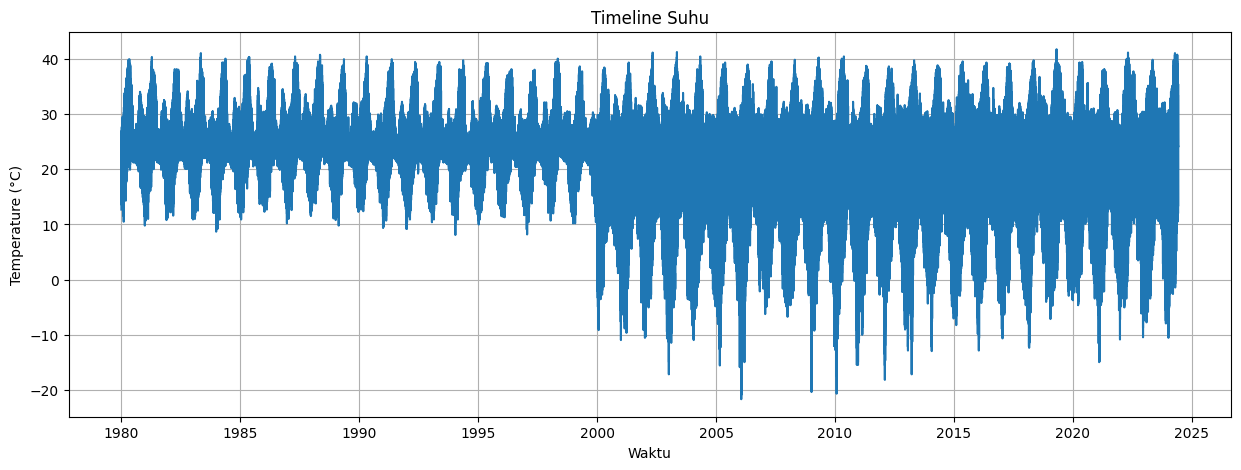

In [ ]:
# Memvisualisasi Time-series
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df_gabungan['time'], df_gabungan['temperature'])
plt.title("Timeline Suhu")
plt.xlabel("Waktu")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

**FEATURE SELECTION**

In [ ]:
# Menentukan fitur untuk model
selected_features =  ['temperature',
                      'relative_humidity',
                      'dew_point',
                      'rain (mm)',
                      'snowfall (cm)',
                      'pressure_msl (hPa)',
                      'surface_pressure (hPa)',
                      'cloud_cover (%)', \
                      'cloud_cover_low (%)',
                      'cloud_cover_mid (%)',
                      'cloud_cover_high (%)',
                      'vapour_pressure_deficit (kPa)',
                      'wind_speed_10m (km/h)',
                      'wind_direction',
                      'is_Day' ]

# Memilih fitur untuk split data
X = df_gabungan[selected_features]
y = df_gabungan['temperature']

**DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**SCALING & NORMALIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Memilih semua kolom numerik
numeric_cols = df_gabungan.select_dtypes(include=['float64', 'int64']).columns

# Membuat scaler
scaler = StandardScaler()

# Fit & transform
df_gabungan[numeric_cols] = scaler.fit_transform(df_gabungan[numeric_cols])

print("Scaling selesai. Contoh 5 data pertama:")
print(df_gabungan[numeric_cols].head())

Scaling selesai. Contoh 5 data pertama:
   temperature  relative_humidity  dew_point  precipitation (mm)  rain (mm)  \
0    -0.708314           0.626641  -0.236757           -0.200714  -0.197613   
1    -0.686539           0.584400  -0.249619           -0.200714  -0.197613   
2    -0.653875           0.584400  -0.211031           -0.200714  -0.197613   
3    -0.359905           0.415437   0.020498           -0.200714  -0.197613   
4     0.021167          -0.049213   0.161987           -0.200714  -0.197613   

   snowfall (cm)  pressure_msl (hPa)  surface_pressure (hPa)  cloud_cover (%)  \
0      -0.063091            0.090099               -0.732742        -1.041452   
1      -0.063091            0.003609               -0.751507        -0.966101   
2      -0.063091            0.018024               -0.745252        -0.740047   
3      -0.063091            0.191004               -0.692083        -0.488876   
4      -0.063091            0.349570               -0.635788        -0.840515   

**MODELING**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import gc

target = 'temperature'

X = df_gabungan.drop(columns=['time', target])
y = df_gabungan[target]

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance)

del df_gabungan, X, y
gc.collect()

                          feature    importance
6          surface_pressure (hPa)  5.231633e-01
1                       dew_point  2.436002e-01
11  vapour_pressure_deficit (kPa)  2.331796e-01
0               relative_humidity  3.385543e-05
12          wind_speed_10m (km/h)  5.112762e-06
13                 wind_direction  4.949782e-06
5              pressure_msl (hPa)  3.068345e-06
7                 cloud_cover (%)  2.349725e-06
9             cloud_cover_mid (%)  2.273462e-06
10           cloud_cover_high (%)  2.123838e-06
8             cloud_cover_low (%)  1.992919e-06
14                         is_Day  5.732387e-07
2              precipitation (mm)  3.008023e-07
3                       rain (mm)  2.794390e-07
4                   snowfall (cm)  3.513186e-08


24

**FEATURE SELSCTION WITH ALGORITHM**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_train, y_train)

selected = X_train.columns[selector.get_support()]

print("Top 10 fitur terpilih:")
print(selected)

Top 10 fitur terpilih:
Index(['temperature', 'relative_humidity', 'dew_point', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'vapour_pressure_deficit (kPa)', 'is_Day'],
      dtype='object')


In [ ]:
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

print("Feature selection selesai.")
print("Jumlah fitur awal:", X_train.shape[1])
print("Jumlah fitur setelah seleksi:", X_train_sel.shape[1])

# Smart Tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist = {
    'n_estimators': [150, 200, 250, 300],
    'max_depth': [None, 15, 20, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf = RandomForestRegressor(random_state=42)

rf_tuning = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=12,
    cv=2,
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

print(" Smart tuning berjalan... harap tunggu...")
rf_tuning.fit(X_train_sel, y_train)

print("Model terbaik hasil Smart Tuning (Hanya untuk referensi):")
print(rf_tuning.best_estimator_)

# model untuk deploy
model = RandomForestRegressor(
    n_estimators=80,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_sel, y_train)
print("Training model kecil selesai.")

# simpan model kecil
import joblib

joblib.dump(scaler, "scaler.pkl", compress=3)
joblib.dump(selector, "selector.pkl", compress=3)
joblib.dump(model, "model.pkl", compress=3)

print("Model kecil berhasil disimpan.")

Feature selection selesai.
Jumlah fitur awal: 15
Jumlah fitur setelah seleksi: 10
 Smart tuning berjalan... harap tunggu...
Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Model terbaik hasil Smart Tuning (Hanya untuk referensi):
RandomForestRegressor(max_features='sqrt', n_estimators=150, random_state=42)
Training model kecil selesai.
Model kecil berhasil disimpan.


**EVALUATION**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_rf = rf_tuning.best_estimator_
pred = best_rf.predict(X_test_sel)

rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("\n Hasil Evaluasi Random Forest (Best Model) ")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


 Hasil Evaluasi Random Forest (Best Model) 
RMSE: 0.021222814601151687
MAE: 0.011635688450813501
R2 Score: 0.999994671166437


**PIPLINE**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from google.colab import drive
import joblib

drive.mount('/content/drive')


joblib.dump(scaler, "scaler1.pkl", compress=3)
joblib.dump(selector, "selector1.pkl", compress=3)
joblib.dump(model, "model1.pkl", compress=9)

!cp model.pkl /content/drive/MyDrive/
!cp scaler.pkl /content/drive/MyDrive/
!cp selector.pkl /content/drive/MyDrive/

print("Model, scaler, dan selector berhasil disimpan!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model, scaler, dan selector berhasil disimpan!


In [ ]:
train_pred = best_rf.predict(X_train_sel)
test_pred = best_rf.predict(X_test_sel)

from sklearn.metrics import r2_score
print("R2 Train:", r2_score(y_train, train_pred))
print("R2 Test:", r2_score(y_test, test_pred))

R2 Train: 0.9999988680991744
R2 Test: 0.999994671166437


In [ ]:
%%writefile requirements.txt
flask
numpy
scikit-learn==1.3.2
gunicorn

Writing requirements.txt


In [ ]:
!ls -lh model.pkl
!ls -lh scaler.pkl
!ls -lh selector.pkl

-rw-r--r-- 1 root root 4.1M Dec 11 23:27 model.pkl
-rw-r--r-- 1 root root 1.1K Dec 11 23:27 scaler.pkl
-rw-r--r-- 1 root root 772 Dec 11 23:27 selector.pkl
